In [1]:
# magic incantation to make the notebook wider
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [2]:
#magic incantation to make all text in LaTeX font:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

In [3]:
import numpy as np
import pylab as plt
import os, sys
%matplotlib inline
from scipy.signal import savgol_filter

import new_functions as fn
fn = reload(fn)

ImportError: No module named new_functions

In [17]:
TMIN = 0
TMAX = 11810

In [459]:
run10_pickle_file = '/Users/mfisherlevine/Desktop/desy/run10_no_bands_with_VMIs.pickle'
run14_pickle_file = '/Users/mfisherlevine/Desktop/desy/run14_no_bands_with_VMIs.pickle'
run21_pickle_file = '/Users/mfisherlevine/Desktop/desy/run21_no_bands_with_VMIs.pickle'

In [6]:
import SmartCentroider
SmartCentroider = reload(SmartCentroider)
sc10 = SmartCentroider.SmartCentroider(run10_pickle_file)
sc14 = SmartCentroider.SmartCentroider(run14_pickle_file)
sc21 = SmartCentroider.SmartCentroider(run21_pickle_file)


Loading from /Users/mfisherlevine/Desktop/desy/run10_no_bands_with_VMIs.pickle...
Loaded in 3.01s from /Users/mfisherlevine/Desktop/desy/run10_no_bands_with_VMIs.pickle
Loading from /Users/mfisherlevine/Desktop/desy/run14_no_bands_with_VMIs.pickle...
Loaded in 29.26s from /Users/mfisherlevine/Desktop/desy/run14_no_bands_with_VMIs.pickle
Loading from /Users/mfisherlevine/Desktop/desy/run21_no_bands_with_VMIs.pickle...
Loaded in 20.32s from /Users/mfisherlevine/Desktop/desy/run21_no_bands_with_VMIs.pickle


In [7]:
sc10_data = sc10.ret

In [43]:
TMIN = 8100
TMAX = 8550

In [44]:
sc10_raw = []
run_10_dir = '/Users/mfisherlevine/Desktop/desy/Data/Run10/'
run_10_datafiles = [run_10_dir + _ for _ in os.listdir(run_10_dir)]

for filename in run_10_datafiles:
    sc10_raw.extend(fn.GetTimecodes_SingleFile(filename,skiplines=1))
print len(sc10_raw)

9204076


In [45]:
sc10_cent = []
sc10_cent4 = []
for filename in sc10_data.keys():
    for x,y,t,npix in zip(sc10_data[filename]['xs'],
                          sc10_data[filename]['ys'],
                          sc10_data[filename]['ts'],
                          sc10_data[filename]['npixs']):
        sc10_cent.append(t)
        if npix >= 4:
            sc10_cent4.append(t)
print len(sc10_cent)
print len(sc10_cent4)

609826
553061


In [46]:
sc10_raw = [TMAX-_ for _ in sc10_raw]
sc10_cent = [TMAX-_ for _ in sc10_cent]
sc10_cent4 = [TMAX-_ for _ in sc10_cent4]

(0, 1.05)

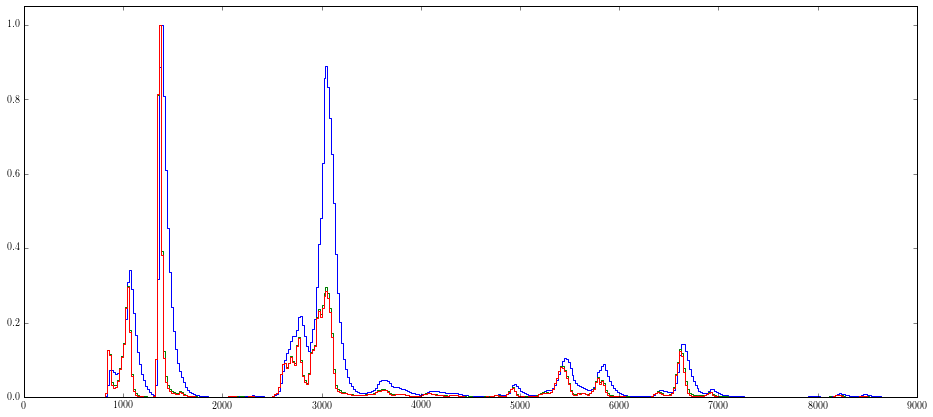

In [310]:
xs, ys10_raw   = fn.myHistBinsizeOne(sc10_raw,   0,TMAX-TMIN, plot=False)
xs, ys10_cent  = fn.myHistBinsizeOne(sc10_cent,  0,TMAX-TMIN, plot=False)
xs, ys10_cent4 = fn.myHistBinsizeOne(sc10_cent4, 0,TMAX-TMIN, plot=False)
ys10_raw   = np.asarray(ys10_raw,   dtype=np.float64) / np.max(ys10_raw)
ys10_cent  = np.asarray(ys10_cent,  dtype=np.float64) / np.max(ys10_cent)
ys10_cent4 = np.asarray(ys10_cent4, dtype=np.float64) / np.max(ys10_cent4)

xs = [_*20 for _ in xs]

fig = plt.figure(figsize=(16,7))
plt.step(xs, ys10_raw)
plt.step(xs, ys10_cent)
plt.step(xs, ys10_cent4)
plt.ylim(0,1.05)

In [48]:
mcp_10_file = '/Users/mfisherlevine/Desktop/desy/Run10_MCP.txt'

0.124661802847
15.71961


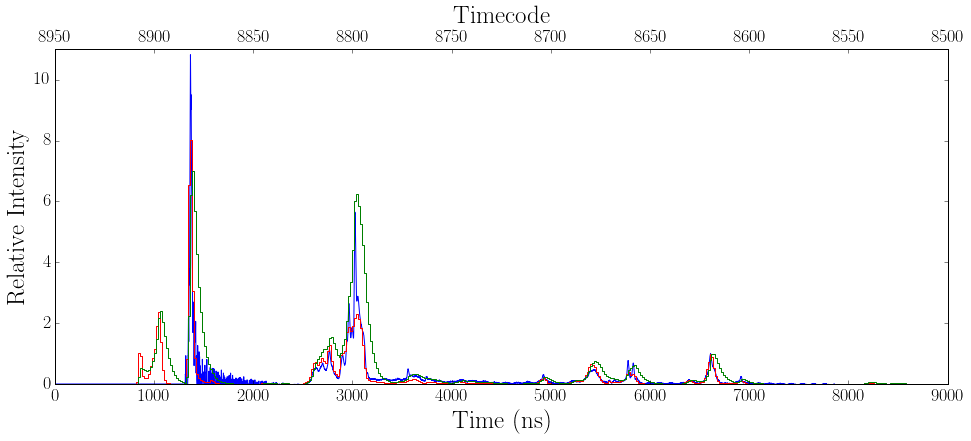

In [350]:
xs, ys10_cent4 = fn.myHistBinsizeOne(sc10_cent4, 0,TMAX-TMIN, plot=False)
xs, ys10_raw   = fn.myHistBinsizeOne(sc10_raw,   0,TMAX-TMIN, plot=False)

ys10_cent4 = np.asarray(ys10_cent4, dtype=np.float64) / np.max(ys10_cent4)
ys10_raw   = np.asarray(ys10_raw,   dtype=np.float64) / np.max(ys10_raw)
xs = [_*20 for _ in xs]


xs_mcp, ys_mcp = np.loadtxt(mcp_10_file, unpack=True)
ys_mcp[0:zero_before*2]=0
xs_mcp = [_ - MCP_TZERO for _ in xs_mcp]



MCP_min = 4000*2
MCP_max = 12000*2
MCP_TZERO = 4000 + 140

# zero_before = 5000 - 1000
zero_before = 5000 + 451 # cut out light peak

# windows, in ns, to normalise to
norm_min = 6000
norm_max = 7000
print max(ys10_cent4[norm_min/20:norm_max/20])
print max(ys_mcp[MCP_TZERO*2+(norm_min*2):MCP_TZERO*2+(norm_max*2)])





# ys_mcp = savgol_filter(ys_mcp, 61, 3)
ys_mcp = np.asarray(ys_mcp,  dtype=np.float64) / np.max(ys_mcp[11000:])

cent_rescale = max(ys10_cent4[norm_min/20:norm_max/20])
raw_rescale  = max(ys10_raw[norm_min/20:norm_max/20])

mcp_rescale = max(ys_mcp[MCP_TZERO*2+(norm_min*2):MCP_TZERO*2+(norm_max*2)])

ys_mcp = np.asarray(ys_mcp,  dtype=np.float64) / mcp_rescale
ys10_cent4 = np.asarray(ys10_cent4,  dtype=np.float64) / cent_rescale
ys10_raw   = np.asarray(ys10_raw,    dtype=np.float64) / raw_rescale

# ys_mcp = np.asarray(ys_mcp,  dtype=np.float64) / 10
# ys10_cent4 = np.asarray(ys10_cent4,  dtype=np.float64) / 10


fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)
ax1.tick_params(axis='both', which='major', labelsize=18)

ax2 = ax1.twiny()
ax2.tick_params(axis='both', which='major', labelsize=18)
xs_top = [_ + 8500 for _ in range(len(xs))]
ax2.plot(xs_top, np.ones_like(xs_top))
ax2.invert_xaxis()
ax2.cla()
ax2.set_xlabel('Timecode', fontsize=25)


# plt.step(xs, ys10_cent)
ax1.plot(xs_mcp[MCP_min:MCP_max], ys_mcp[MCP_min:MCP_max], 'b')
# plt.plot(xs_mcp[MCP_min:MCP_max], ys_mcp_raw[MCP_min:MCP_max], 'g')
ax1.step(xs, ys10_cent4, 'r', lw=1.)
ax1.step(xs, ys10_raw, 'g', lw=1.)


ax1.set_xlabel('Time (ns)', fontsize=25)
ax1.set_ylabel('Relative Intensity', fontsize=25)

ax1.set_ylim(0, 11)
# ax1.set_ylim(0, 1.2)
ax1.set_xlim(0, 9000)
plt.savefig('/Users/mfisherlevine/Desktop/desy/new_plots/temp2.pdf')
plt.show()

0.124661802847
15.71961


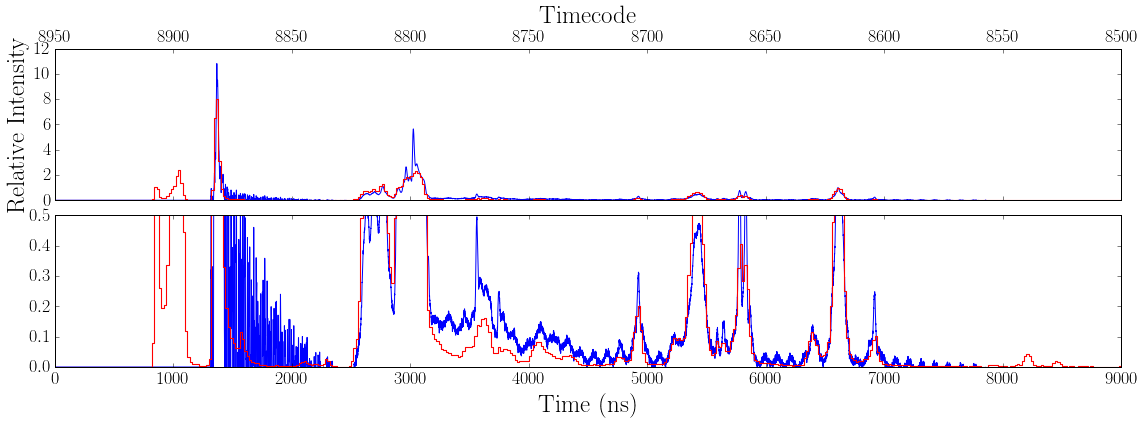

In [410]:
xs, ys10_cent4 = fn.myHistBinsizeOne(sc10_cent4, 0,TMAX-TMIN, plot=False)
xs, ys10_raw   = fn.myHistBinsizeOne(sc10_raw,   0,TMAX-TMIN, plot=False)

ys10_cent4 = np.asarray(ys10_cent4, dtype=np.float64) / np.max(ys10_cent4)
ys10_raw   = np.asarray(ys10_raw,   dtype=np.float64) / np.max(ys10_raw)
xs = [_*20 for _ in xs]


xs_mcp, ys_mcp = np.loadtxt(mcp_10_file, unpack=True)
ys_mcp[0:zero_before*2]=0
xs_mcp = [_ - MCP_TZERO for _ in xs_mcp]



MCP_min = 4000*2
MCP_max = 12000*2
MCP_TZERO = 4000 + 140

# zero_before = 5000 - 1000
zero_before = 5000 + 451 # cut out light peak

# windows, in ns, to normalise to
norm_min = 6000
norm_max = 7000
print max(ys10_cent4[norm_min/20:norm_max/20])
print max(ys_mcp[MCP_TZERO*2+(norm_min*2):MCP_TZERO*2+(norm_max*2)])


# ys_mcp = savgol_filter(ys_mcp, 61, 3)
ys_mcp = np.asarray(ys_mcp,  dtype=np.float64) / np.max(ys_mcp[11000:])

cent_rescale = max(ys10_cent4[norm_min/20:norm_max/20])
raw_rescale  = max(ys10_raw[norm_min/20:norm_max/20])

mcp_rescale = max(ys_mcp[MCP_TZERO*2+(norm_min*2):MCP_TZERO*2+(norm_max*2)])

ys_mcp = np.asarray(ys_mcp,  dtype=np.float64) / mcp_rescale
ys10_cent4 = np.asarray(ys10_cent4,  dtype=np.float64) / cent_rescale
ys10_raw   = np.asarray(ys10_raw,    dtype=np.float64) / raw_rescale

# ys_mcp = np.asarray(ys_mcp,  dtype=np.float64) / 10
# ys10_cent4 = np.asarray(ys10_cent4,  dtype=np.float64) / 10


fig, (ax1, ax3) = plt.subplots(2, sharex=True, sharey=False, figsize=(16,6))


ax1.tick_params(axis='both', which='major', labelsize=18)

ax2 = ax1.twiny()
ax2.tick_params(axis='both', which='major', labelsize=18)
xs_top = [_ + 8500 for _ in range(len(xs))]
ax2.plot(xs_top, np.ones_like(xs_top))
ax2.invert_xaxis()
ax2.cla()
ax2.set_xlabel('Timecode', fontsize=25)


# plt.step(xs, ys10_cent)
ax1.plot(xs_mcp[MCP_min:MCP_max], ys_mcp[MCP_min:MCP_max], 'b')
# plt.plot(xs_mcp[MCP_min:MCP_max], ys_mcp_raw[MCP_min:MCP_max], 'g')
ax1.step(xs, ys10_cent4, 'r', lw=1.1)
# ax1.step(xs, ys10_raw, 'g', lw=1.1)


ax1.set_ylabel('Relative Intensity', fontsize=25)

ax1.set_ylim(0, 12)
ax1.set_xlim(0, 9000)






ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.plot(xs_mcp[MCP_min:MCP_max], ys_mcp[MCP_min:MCP_max], 'b')
ax3.step(xs, ys10_cent4, 'r', lw=1.1)
# ax3.step(xs, ys10_raw, 'g', lw=1.1)
ax3.set_ylim(0, 0.5)

ax3.set_xlabel('Time (ns)', fontsize=25)



plt.tight_layout()
fig.subplots_adjust(hspace=0.1)


plt.savefig('/Users/mfisherlevine/Desktop/desy/new_plots/temp.pdf')
plt.show()

0.124661802847
15.71961


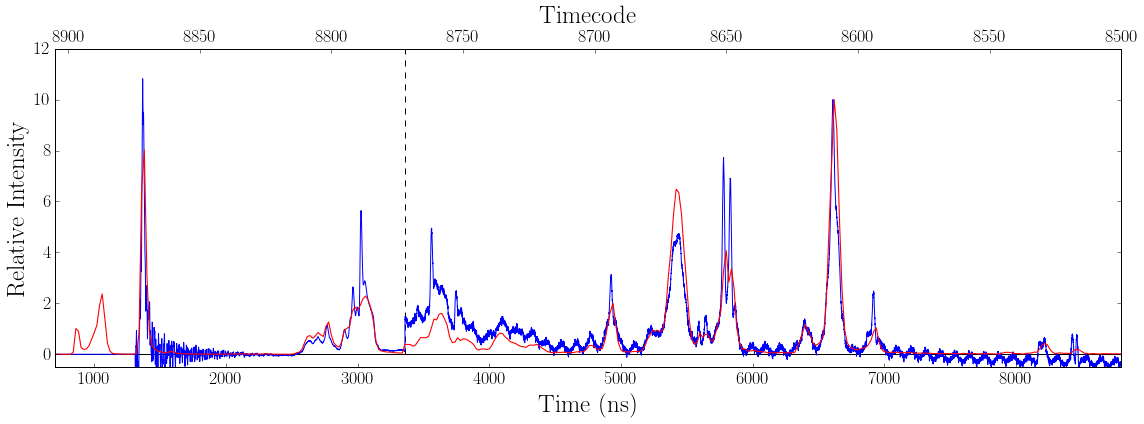

In [481]:
xs, ys10_cent4 = fn.myHistBinsizeOne(sc10_cent4, 0,TMAX-TMIN, plot=False)
xs, ys10_raw   = fn.myHistBinsizeOne(sc10_raw,   0,TMAX-TMIN, plot=False)

ys10_cent4 = np.asarray(ys10_cent4, dtype=np.float64) / np.max(ys10_cent4)
ys10_raw   = np.asarray(ys10_raw,   dtype=np.float64) / np.max(ys10_raw)
xs = [_*20 for _ in xs]


xs_mcp, ys_mcp = np.loadtxt(mcp_10_file, unpack=True)
ys_mcp[0:zero_before*2]=0
xs_mcp = [_ - MCP_TZERO for _ in xs_mcp]

xmin = 700
xmax = 8800


MCP_min = 4000*2
MCP_max = 12000*2
MCP_TZERO = 4000 + 140

# zero_before = 5000 - 1000
zero_before = 5000 + 451 # cut out light peak

# windows, in ns, to normalise to
norm_min = 6000
norm_max = 7000

# norm_min = 5500
# norm_max = 6000
print max(ys10_cent4[norm_min/20:norm_max/20])
print max(ys_mcp[MCP_TZERO*2+(norm_min*2):MCP_TZERO*2+(norm_max*2)])


# ys_mcp = savgol_filter(ys_mcp, 61, 3)
ys_mcp = np.asarray(ys_mcp,  dtype=np.float64) / np.max(ys_mcp[11000:])

cent_rescale = max(ys10_cent4[norm_min/20:norm_max/20])
raw_rescale  = max(ys10_raw[norm_min/20:norm_max/20])

mcp_rescale = max(ys_mcp[MCP_TZERO*2+(norm_min*2):MCP_TZERO*2+(norm_max*2)])

ys_mcp = np.asarray(ys_mcp,  dtype=np.float64) / mcp_rescale
ys10_cent4 = np.asarray(ys10_cent4,  dtype=np.float64) / cent_rescale
ys10_raw   = np.asarray(ys10_raw,    dtype=np.float64) / raw_rescale


mult = 10.
mult_boundary = 3360

ys10_cent4[mult_boundary/20:] = [mult*_ for _ in ys10_cent4[mult_boundary/20:]]
ys10_raw[mult_boundary/20:] = [mult*_ for _ in ys10_raw[mult_boundary/20:]]
ys_mcp[MCP_TZERO*2+(mult_boundary*2):] = [mult*_ for _ in ys_mcp[MCP_TZERO*2+(mult_boundary*2):]]



# ys_mcp = np.asarray(ys_mcp,  dtype=np.float64) / 10
# ys10_cent4 = np.asarray(ys10_cent4,  dtype=np.float64) / 10


fig, (ax1) = plt.subplots(1, sharex=True, sharey=False, figsize=(16,6))


ax1.tick_params(axis='both', which='major', labelsize=18)

ax2 = ax1.twiny()
ax2.tick_params(axis='both', which='major', labelsize=18)
xs_top = [_ + 8500 for _ in range(len(xs))]
ax2.plot(xs_top, np.ones_like(xs_top))
ax2.cla()
ax2.set_xlabel('Timecode', fontsize=25)
ax1.set_xlabel('Time (ns)', fontsize=25)


# plt.step(xs, ys10_cent)
ax1.plot(xs_mcp[MCP_min:], ys_mcp[MCP_min:], 'b')
# plt.plot(xs_mcp[MCP_min:MCP_max], ys_mcp_raw[MCP_min:MCP_max], 'g')
ax1.plot(xs, ys10_cent4, 'r', lw=1.1)
# ax1.plot(xs, ys10_raw, 'g', lw=1.1)


ax1.set_ylabel('Relative Intensity', fontsize=25)

ax1.set_ylim(-.5, 12)
ax1.set_xlim(xmin, xmax)
ax2.set_xlim(8500, 8500+(xmax-xmin)/20)
ax2.invert_xaxis()


ax1.vlines(mult_boundary, 0, 12, linestyles='--')
ax1.hlines(0, 0, 10000, linestyles='-')


plt.tight_layout()
fig.subplots_adjust(hspace=0.1)


plt.savefig('/Users/mfisherlevine/Desktop/desy/new_plots/not_below_zero.pdf')
plt.show()

In [414]:
print xs[0:10]

[0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0]


(0, 10000)

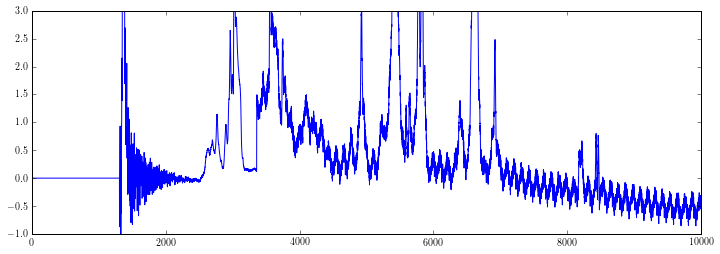

In [473]:
fig = plt.figure(figsize=(12,4))
plt.plot(xs_mcp, ys_mcp)
plt.ylim(-1,3)
plt.xlim(0,10000)

In [132]:
np.max(ys_mcp[12000:])

88.754170000000002

In [114]:
print len(ys_mcp)

50000


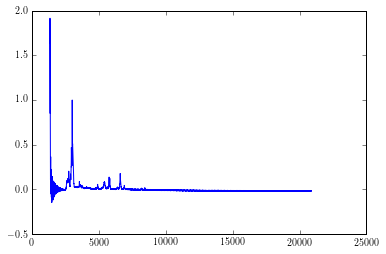

In [134]:
plt.plot(xs_mcp[11000:], ys_mcp[11000:])


451

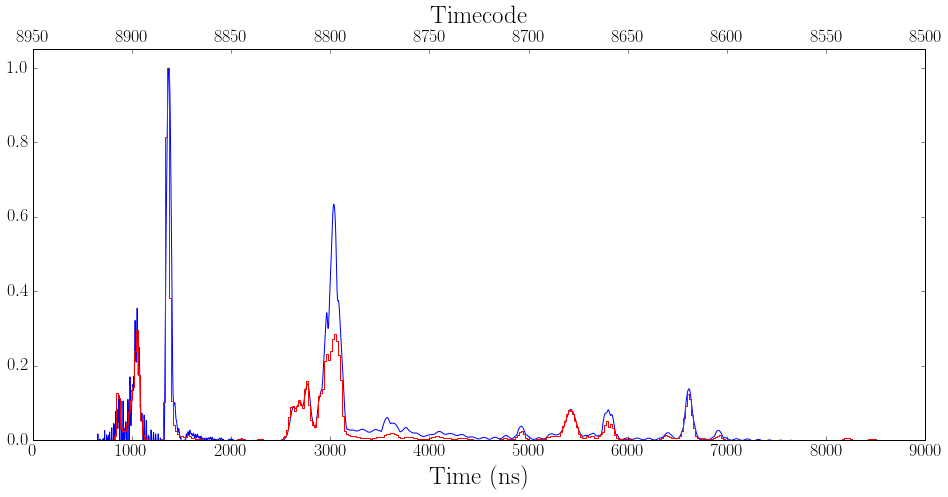

In [241]:
# MCP_min = 4000*2
# MCP_max = 12000*2
# MCP_TZERO = 4000 + 140

# zero_before = 5000 - 1000

# xs_mcp, ys_mcp = np.loadtxt(mcp_10_file, unpack=True)
# ys_mcp_raw = np.copy(ys_mcp)
# xs_mcp[0:zero_before*2]=0
# xs_mcp = [_ - MCP_TZERO for _ in xs_mcp]

# ys_mcp = savgol_filter(ys_mcp, 201, 3)
# ys_mcp_raw = np.asarray(ys_mcp_raw,  dtype=np.float64) / np.max(ys_mcp[11000:])

# ys_mcp = np.asarray(ys_mcp,  dtype=np.float64) / np.max(ys_mcp[11000:])


# fig = plt.figure(figsize=(16,7))
# ax1 = fig.add_subplot(111)
# ax1.tick_params(axis='both', which='major', labelsize=18)

# ax2 = ax1.twiny()
# ax2.tick_params(axis='both', which='major', labelsize=18)
# xs_top = [_ + 8500 for _ in range(len(xs))]
# ax2.plot(xs_top, np.ones_like(xs_top))
# ax2.invert_xaxis()
# ax2.cla()
# ax2.set_xlabel('Timecode', fontsize=25)


# # plt.step(xs, ys10_raw)
# # plt.step(xs, ys10_cent)
# ax1.plot(xs_mcp[MCP_min:MCP_max], ys_mcp[MCP_min:MCP_max], 'b')
# # plt.plot(xs_mcp[MCP_min:MCP_max], ys_mcp_raw[MCP_min:MCP_max], 'g')
# ax1.step(xs, ys10_cent4, 'r', lw=1.)


# ax1.set_xlabel('Time (ns)', fontsize=25)
# plt.ylabel('Relative Intensity', fontsize=25)

# ax1.set_ylim(0, 1.05)
# ax1.set_xlim(0, 9000)
# plt.show()

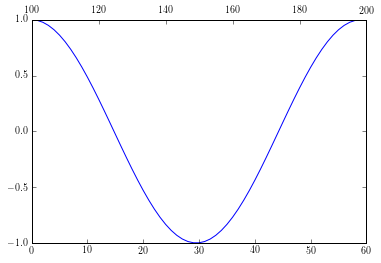

In [197]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

a = np.cos(2*np.pi*np.linspace(0, 1, 60.))

temp = [100+_ for _ in range(100)]

ax1.plot(range(60), a)
ax2.plot(temp, np.ones(100)) # Create a dummy plot
ax2.cla()
plt.show()

In [34]:
# # RUN = 10
# # RUN = 21
# RUN = 14

# if RUN == 10:
#     beam_mon_file = '/Users/mfisherlevine/Desktop/desy/RUN10.txt'
#     timepix_data_dir = '/Users/mfisherlevine/Desktop/desy/Data/Run10/'
#     MCP_file = ''
# elif RUN == 21:
#     beam_mon_file = '/Users/mfisherlevine/Desktop/desy/RUN21.txt'
#     timepix_data_dir = '/Users/mfisherlevine/Desktop/desy/Data/Run21/'
#     MCP_file = ''
# elif RUN == 14:
#     beam_mon_file = '/Users/mfisherlevine/Desktop/desy/RUN21.txt'
#     timepix_data_dir = '/Users/mfisherlevine/Desktop/desy/Data/Run14/'
#     MCP_file = ''
# else:
#     print 'ERROR: Bad run number'
# tp_datafiles = [timepix_data_dir + _ for _ in os.listdir(timepix_data_dir)]
# print 'Found %s datafiles for run %s'%(len(tp_datafiles), RUN)

Found 35000 datafiles for run 14


In [66]:
clust_sizes = []
for frame, dic in data.items():
    clust_sizes.extend(dic['npixs'])

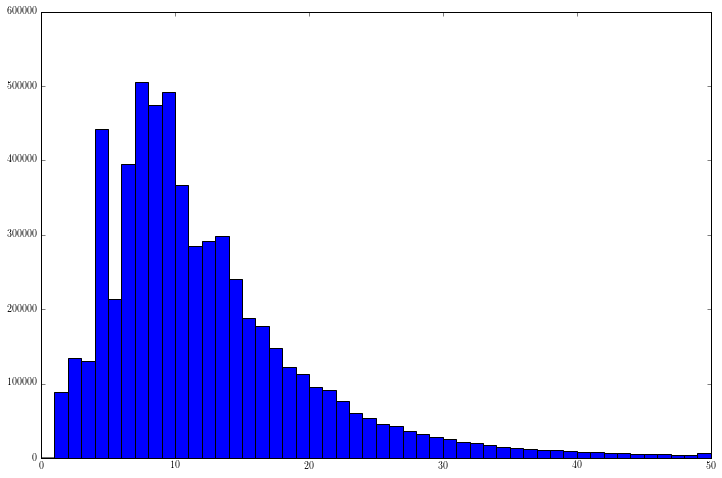

In [73]:
import pylab as plt
fig = plt.figure(figsize=(12,8))

a,b,c = plt.hist(clust_sizes, bins=50, range=[0,50])

In [86]:
print ys.dtype

int64


Estimated time for completion is another 8.2 seconds...


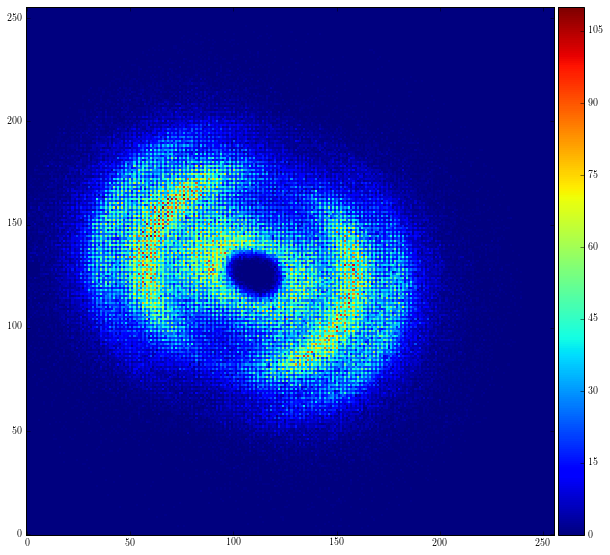

In [95]:
band = (8235, 8243)
sc.use_gaussians=False
img_no_gaus_round = sc.MakeSingleVMI(band, round_centroid_coords=True, only_use_n_files=1e9)
sc.ShowVMIimage(img_no_gaus_round)

In [97]:
RUN = 14
if RUN == 14:
    beam_mon_file = '/Users/mfisherlevine/Desktop/desy/RUN21.txt'
    timepix_data_dir = '/Users/mfisherlevine/Desktop/desy/Data/Run14/'
    MCP_file = ''
else:
    print 'ERROR: Bad run number'
tp_datafiles = [timepix_data_dir + _ for _ in os.listdir(timepix_data_dir)]
print 'Found %s datafiles for run %s'%(len(tp_datafiles), RUN)

Found 35000 datafiles for run 14


In [110]:
import SmartCentroider
SmartCentroider = reload(SmartCentroider)

In [ ]:
sc.BuildMainTOF()

In [ ]:
import new_functions as fn
fn = reload(fn)
import pylab as plt


In [ ]:
plt.figure(figsize=(20,8))
print sc.main_TOF[0,0], sc.main_TOF[-1,0]
plt.step(sc.main_TOF[:,0], sc.main_TOF[:,1])
collapsed_bands = fn.CollapseBands(sc.bands)

plt.plot(collapsed_bands, [500 for _ in collapsed_bands], 'ro')
plt.xlim(pl.xlim()[::-1])

In [ ]:
sc2.bands = [(8135, 8170),
         (8170, 8210),
         (8210, 8224),
         (8224, 8244),
         (8244, 8267),
         (8267, 8289),
         (8289, 8317),
         (8317, 8338),
         (8338, 8351),
         (8351, 8362),
         (8362, 8382),
         (8382, 8403),
         (8403, 8425),
         (8425, 8460),
         (8460, 8488),
         (8488, 8550)]


In [ ]:
data = sc.run()

In [ ]:
sc2 = SmartCentroider.SmartCentroider(tp_datafiles)
sc2.skiplines = 1
sc2.ToF_noise_threshold = 200
sc2.n_tof_files = 500
sc2.TMAX = 9500


In [ ]:
sc2.bands = [(0,11810)]

In [ ]:
data2 = sc2.run()

In [ ]:
sc2.BuildMainTOF()
sc2.bands = [(8000, 8325),
             (8325, 8450),
             (8450, 8488),
             (8488, 8550)]
plt.figure(figsize=(20,8))
plt.step(sc2.main_TOF[:,0], sc2.main_TOF[:,1])
collapsed_bands = fn.CollapseBands(sc2.bands)
plt.plot(collapsed_bands, [500 for _ in collapsed_bands], 'ro')
plt.xlim((8507,8201))

In [ ]:
sc3 = SmartCentroider.SmartCentroider(tp_datafiles)
sc3.skiplines = 1
sc3.ToF_noise_threshold = 200
sc3.n_tof_files = 500
sc3.TMAX = 9500
sc3.bands = [(8000, 8325),
             (8325, 8450),
             (8450, 8488),
             (8488, 8550)]

data3 = sc3.run()



In [ ]:
sc3.BuildMainTOF()
plt.figure(figsize=(20,8))
plt.step(sc.main_TOF[:,0], sc.main_TOF[:,1] ,'g')
plt.step(sc2.main_TOF[:,0], sc2.main_TOF[:,1] ,'b')
plt.step(sc3.main_TOF[:,0], sc3.main_TOF[:,1] ,'r')

collapsed_bands = fn.CollapseBands(sc3.bands)
# plt.plot(collapsed_bands, [500 for _ in collapsed_bands], 'ro')
plt.xlim((8507,8201))

In [ ]:
sc4 = SmartCentroider.SmartCentroider(tp_datafiles)
sc4.skiplines = 1
sc4.ToF_noise_threshold = 200
sc4.n_tof_files = 500
sc4.TMAX = 9500
sc4.bands = [(8000, 8325),
             (8325, 8450),
             (8450, 8489),
             (8489, 8550)]

data3 = sc4.run()



In [ ]:

sc4.BuildMainTOF()
plt.figure(figsize=(20,8))
plt.step(sc4.main_TOF[:,0], sc4.main_TOF[:,1] ,'g')
plt.step(sc2.main_TOF[:,0], sc2.main_TOF[:,1] ,'b')
plt.step(sc3.main_TOF[:,0], sc3.main_TOF[:,1] ,'r')

collapsed_bands = fn.CollapseBands(sc3.bands)
# plt.plot(collapsed_bands, [500 for _ in collapsed_bands], 'ro')
plt.xlim((8507,8201))

In [ ]:
maxval = int(np.max(img)) #get largest timecode
minval = int(np.min(img[img>0])) #get smallest non-zero timecode
# a,b,c =pl.hist(img[img>0],bins = (maxval-minval)+1)
ys = ndimage.histogram(img[img>0],minval,maxval,bins = (maxval-minval)+1) #much faster than pl.hist
xs = np.linspace(minval,maxval,(maxval-minval+1)) #make x points for ToF plot
f = pl.figure(figsize=[12,4]) #Make the figure an appropriate shape
pl.plot(xs,ys,'b') #plot the original ToF
pl.xlim(minval,maxval) #set limits as python is weird sometimes
new_ys = scipy.signal.savgol_filter(ys,5,3) # smooth the ToF as it's only a single shot
pl.plot(xs,new_ys,'r')#plot the new, smoothed ToF
max_indexes = scipy.signal.argrelmax(new_ys, axis=0, order=20) #find local maxima, range of 5 each side
peaks = [xs[_] for _ in max_indexes[0]] # Get peak location from indices

bands = [] # generate banks from peaks - need to take the midpoints though!
bands.append((minval,(peaks[0]+peaks[1])//2)) #first point to midpoint of first peaks
for i in xrange(1,len(peaks)-1):
    bands.append((bands[-1][1],(peaks[i]+peaks[i+1])//2)) # loop through
bands.append((bands[-1][0],maxval))# add last midpoint to last value


pl.plot(peaks,[-10 for _ in max_indexes[0]],'bo') # plot peaks in blue
pl.plot([_[0] for _ in bands],[10 for _ in bands],'ro') # plot left band boundaries in red
pl.plot([_[1] for _ in bands],[10 for _ in bands],'ro') # plot right band boundaries in red too
pl.show()
   
##########
f = pl.figure(figsize=[12,4]) #Make the figure an appropriate shape
a,b,c = pl.hist(t_centroids,max(t_centroids)-min(t_centroids)+1)
pl.xlim(minval,maxval) #set limits as python is weird sometimes


In [ ]:
struct_el=[[0,1,0],[1,1,1],[0,1,0]] # for vertical/horizontal connections only
# struct_el=[[1,1,1],[1,1,1],[1,1,1]] # for including diagonal connections as well

from scipy.ndimage.measurements import center_of_mass, maximum_position

segmentation,segments=scipy.ndimage.label(img,struct_el) # find clusters
print 'Found %s clusters without using band information'%segments

print 'Using %s bands...'%len(bands)
seg_sum = 0
t_centroids = []
for i,(tmin, tmax) in enumerate(bands):
#     if i!=6: continue
    band_img = img.copy() #make a copy
    band_img[band_img > tmax] = 0 #threshold new image
    band_img[band_img <= tmin] = 0

#     f = pl.figure(figsize=[8,8]) 
#     pl.imshow(band_img)
    
    segmentation,segments = scipy.ndimage.label(band_img,struct_el) # find clusters
    CoMs = center_of_mass(band_img, segmentation, [_ for _ in xrange(1,segments+1)])
#     CoMs = maximum_position(band_img, segmentation, [_ for _ in xrange(1,segments+1)])
#     print CoMs
#     index = (np.asarray([_[0] for _ in CoMs]),np.asarray([[_[1] for _ in CoMs]]))
#     codes = img[CoMs]
    for com in CoMs:
        t_centroids.append(img[com])
#     break
#     for clust_num in xrange(1,segments): # cluster 0 = background
#         clust_pix = np.where(segmentation==clust_num)
#         t_centroids.append(np.max(img[clust_pix]))

#     print 'Found %s segs in band %s (%s - %s)'%(segments,i, tmin, tmax)
    seg_sum += segments
#     break

print 'Found %s clusters when using bands'%seg_sum
print t_centroids

In [ ]:
f = pl.figure(figsize=[8,8]) 

pl.imshow(segmentation)
print type(segmentation[0][0])

In [ ]:
# struct_el=[[0,1,0],[1,1,1],[0,1,0]] # for vertical/horizontal connections only
# # struct_el=[[1,1,1],[1,1,1],[1,1,1]] # for including diagonal connections as well

# # import scipy.ndimage.measurements.center_of_mass as center_of_mass

# segmentation,segments=scipy.ndimage.label(img,struct_el) # find clusters
# print 'Found %s clusters without using band information'%segments

# print 'Using %s bands...'%len(bands)
# seg_sum = 0
# t_centroids = []
# now = time.time()
# for filename in tp_datafiles[0:100]:
#     for i,(tmin, tmax) in enumerate(bands):
#         band_img = img.copy() #make a copy
#         band_img[band_img > tmax] = 0 #threshold new image
#         band_img[band_img <= tmin] = 0

#         segmentation,segments=scipy.ndimage.label(band_img,struct_el) # find clusters
#         for clust_num in xrange(1,segments): # cluster 0 = background
#             clust_pix = np.where(segmentation==clust_num)
#             t_centroids.append(np.max(img[clust_pix]))
        
#     #     print 'Found %s segs in band %s (%s - %s)'%(segments,i, tmin, tmax)
#         seg_sum += segments
# print 'Time = %s secs'%(time.time()-now)
# print 'Found %s clusters when using bands'%seg_sum
# # print t_centroids

###########

struct_el=[[0,1,0],[1,1,1],[0,1,0]] # for vertical/horizontal connections only
# struct_el=[[1,1,1],[1,1,1],[1,1,1]] # for including diagonal connections as well

# import scipy.ndimage.measurements.center_of_mass as center_of_mass

segmentation,segments=scipy.ndimage.label(img,struct_el) # find clusters
print 'Found %s clusters without using band information'%segments

print 'Using %s bands...'%len(bands)
seg_sum = 0
t_centroids = []
now = time.time()
for filenum, filename in enumerate(tp_datafiles):
    if filenum%1000==0: print 'Processed %s files'%filenum
    img = fn.TimepixFileToImage(filename)
    for i,(tmin, tmax) in enumerate(bands):
        band_img = img.copy() #make a copy
        band_img[band_img > tmax] = 0 #threshold new image
        band_img[band_img <= tmin] = 0

        segmentation,segments = scipy.ndimage.label(band_img,struct_el) # find clusters
#         CoMs = center_of_mass(band_img, segmentation, [_ for _ in xrange(1,segments+1)])
        CoMs = maximum_position(band_img, segmentation, [_ for _ in xrange(1,segments+1)])
        for com in CoMs:
            t_centroids.append(img[com])
        seg_sum += segments

print 'Time = %s secs'%(time.time()-now)
print 'Found %s clusters when using bands'%seg_sum


In [ ]:
fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)
print len(t_centroids)
print 'As a histogram:'
ys, binEdges, dummy = pl.hist(all_ts, bins=bins, range=range, histtype = 'step')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
turn_cent, stat_cent, troughs_cent, peaks_cent = fn.GetTurningPoints(ys, bincenters, noise=50)
lims = pl.ylim()
pl.ylim([lims[0], y_rescale*max(ys)])
ax.set_xticks(troughs_cent, minor=False)
ax.xaxis.grid(True, which='major')
pl.show()

fig = pl.figure(figsize=[16,4])
pl.hist([((11810-_-TZERO)*20) for _ in t_centroids], bins, range=range, histtype = 'step')

pl.show()

In [ ]:
clusters = segmentation.copy() # make a copy to preserve original image
for i in xrange(1,segments+1):# loop over clusters
    clusters[clusters==i]=np.random.randint(0,segments+1) #colour each cluster a random colour
clusters[clusters==0]=np.nan #for a white background

In [ ]:
f = pl.figure(figsize=[8,8])
pl.imshow(clusters)

In [ ]:
fn = reload(fn)
TCUT = 8000
print tp_datafiles[0]

fn.ShowClusteredImage(tp_datafiles[1],TCUT)

In [ ]:
print 'hello'

In [ ]:
fn = reload(fn)
import cPickle as pickle

# NB These are different units!
TCUT = 257 #Raw timecode cut for centroiding
TZERO = 3300 #Time, in ns, after inversion and conversion, to set as t0

run_id = '%s_tcut%s_tzero%s'%(RUN, TCUT, TZERO)
pickle_filename = '/Users/mfisherlevine/Desktop/desy/pickles/tp_data_run'+run_id+'.pickle'

now = time.time()
# if False:
if not os.path.exists(pickle_filename):
    for i, bunchID in enumerate(tp_data.keys()):
    #     if 'ts' in tp_data[bunchID].keys(): continue #already loaded
        if i%100==0:print 'Centroided %s frames'%i; sys.stdout.flush()

        filename = tp_data[bunchID]['filename']
        dummy, xs, ys, ts, npixs = fn.GetCentroidsXYTFromFile(filename, TCUT)#, gating=[8400,8])
        tp_data[bunchID]['xs'] = xs
        tp_data[bunchID]['ys'] = ys
        tp_data[bunchID]['ts'] = [(_-TZERO)*20 for _ in ts]#already inverted, just translate to ns
        tp_data[bunchID]['npixs'] = npixs
        tp_data[bunchID]['n_ions'] = len(xs)

    pickle_file = open(pickle_filename, 'wb')
    pickle.dump(tp_data, pickle_file)
    pickle_file.close()
    print 'Took %s secs'%(time.time() - now)

else:
    print 'Unpickling...'; sys.stdout.flush()
#     pickle_filename = '/Users/mfisherlevine/Desktop/desy/pickles/tp_data_run'+str(RUN)+'.pickle'
    pickle_file = open(pickle_filename, 'rb')
    tp_data = pickle.load(pickle_file)
    pickle_file.close()
    print 'Loaded %s pickled entries'%len(tp_data)


In [ ]:
# Put all the centroided timecodes in a single list for convenience
all_ts = []
n_loaded = 0
for bunchID in tp_data.keys():
    if 'ts' in tp_data[bunchID].keys():
        all_ts.extend(tp_data[bunchID]['ts'])
        n_loaded += 1
print 'Collated centroided timecodes from %s shots'%n_loaded
print '%s times in total'%len(all_ts)

In [ ]:
n_skipped = 0
offsets = [0]
for offset in offsets:
    xs, ys = [], []
    for bunchID in tp_data.keys():
        try:
            ys.append(tp_data[bunchID]['n_ions']) #NB has to be this one first due to dropped frames
            xs.append(beam_data[bunchID + offset])
        except Exception as e:
            pass
    print 'Offset %s:'%offset
    pl.plot(xs, ys, 'x', markersize=2)
    pl.show()

In [ ]:
# Load the raw timecodes, converting the same way as the others
raw_timecodes = []
for i, filename in enumerate(tp_datafiles):
    if i==1000: print 'Loaded %s files'%i; sys.stdout.flush()
    raw_timecodes.extend(((11810-_)-TZERO)*20 for _ in fn.GetTimecodes_SingleFile(filename, skiplines=1))
print 'Loaded %s raw timecodes'%len(raw_timecodes)

In [ ]:
# range = [0,9000]
range = [0,6000]
# range = [4000,5000]

############
# for the raw spectrum:

y_rescale = 1 # big peak is too big, so clip y-axis by rescaling to this fraction of max
bins = min(int((max(raw_timecodes)-min(raw_timecodes)+1)),(range[1]-range[0]+1))//20

fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)

# as a hist
print 'Raw timecodes a histogram:'
ys, binEdges, dummy = pl.hist(raw_timecodes, bins=bins, range=range, histtype = 'step')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
lims = pl.ylim()
pl.ylim([lims[0], y_rescale*max(ys)])
# ax.set_xticks(ticks, minor=False)
turn_raw, stat_raw, troughs_raw, peaks_raw = fn.GetTurningPoints(ys, bincenters, noise=500)
ax.set_xticks(troughs_raw, minor=False)
ax.xaxis.grid(True, which='major')
pl.show()


############
# for the centroided spectrum:

y_rescale = 0.3 # big peak is too big, so clip y-axis by rescaling to this fraction of max
bins = min(int((max(all_ts)-min(all_ts)+1)),(range[1]-range[0]+1))//20

fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)

# as a hist
print 'As a histogram:'
ys, binEdges, dummy = pl.hist(all_ts, bins=bins, range=range, histtype = 'step')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
turn_cent, stat_cent, troughs_cent, peaks_cent = fn.GetTurningPoints(ys, bincenters, noise=50)
lims = pl.ylim()
pl.ylim([lims[0], y_rescale*max(ys)])
ax.set_xticks(troughs_cent, minor=False)
ax.xaxis.grid(True, which='major')
pl.show()

# as a line graph
print 'As a line graph:'
fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
a = pl.plot(bincenters, ys,'r-')
lims = pl.ylim()
pl.ylim([lims[0], y_rescale*max(ys)])
minor_spacing = 200
xlims = pl.xlim()
# ticks = [_ * minor_spacing for _ in xrange(int(xlims[1]-xlims[0])//minor_spacing)]
ax.set_xticks(troughs_cent, minor=False)
ax.xaxis.grid(True, which='major')
pl.show()
# ax.set_autoscale_on(False)



In [ ]:
bands = []
for i in xrange(len(troughs_cent)-1):
    bands.append((troughs_cent[i],troughs_cent[i+1]))
print bands

In [ ]:
if RUN==10:
    bands = [( 30.0, 140.0), 
             (140.0, 500.0),
             (500.0, 750.0),
             (750.0, 1490.0),
             (1490.0, 1710.0),
             (1710.0, 1870.0),
             (1870.0, 1950.0),
             (1950.0, 2070.0),
             (2070.0, 2210.0),
             (2210.0, 2650.0),
             (2650.0, 2750.0),
             (2750.0, 2810.0),
             (2810.0, 2950.0),
             (2950.0, 3210.0),
             (3210.0, 3490.0),
             (3490.0, 3930.0),
             (3930.0, 4070.0),
             (4070.0, 4370.0),
             (4370.0, 4510.0),
             (4510.0, 4790.0),
             (4790.0, 4830.0),
             (4830.0, 4910.0),
             (4910.0, 5030.0),
             (5030.0, 5530.0),
             (5530.0, 5710.0),
             (5710.0, 5970.0)]

# grab the first of each of these tuples, and append the last to get back the edges
band_edges = [_[0] for _ in bands]; band_edges.append(bands[-1][1])
print band_edges

In [ ]:
# range = [0,9000]
range = [0,6000]

############
# for the centroided spectrum:

y_rescale = 0.3 # big peak is too big, so clip y-axis by rescaling to this fraction of max
bins = min(int((max(all_ts)-min(all_ts)+1)),(range[1]-range[0]+1))//20

fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)

# as a hist
print 'As a histogram:'
ys, binEdges, dummy = pl.hist(all_ts, bins=bins, range=range, histtype = 'step')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
lims = pl.ylim()
pl.ylim([lims[0], y_rescale*max(ys)])
ax.set_xticks(band_edges, minor=False)
ax.xaxis.grid(True, which='major')
pl.show()

#### as a line graph
# print 'As a line graph:'
# fig = pl.figure(figsize=[16,4])
# ax = pl.subplot(111)
# bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
# a = pl.plot(bincenters, ys,'r-')
# lims = pl.ylim()
# pl.ylim([lims[0], y_rescale*max(ys)])
# minor_spacing = 200
# xlims = pl.xlim()
### ticks = [_ * minor_spacing for _ in xrange(int(xlims[1]-xlims[0])//minor_spacing)]
# ax.set_xticks(band_edges, minor=False)
# ax.xaxis.grid(True, which='major')
# pl.show()
# # ax.set_autoscale_on(False)
print band_edges

In [ ]:
n_skipped = 0
for t_range in bands:
    xs, ys = [], []
    for bunchID in tp_data.keys():
        try:
            n_in_range = 0
            for t in tp_data[bunchID]['ts']:
                if t>= t_range[0] and t < t_range[1]:
                    n_in_range += 1
            ys.append(n_in_range) #NB has to be this one first due to dropped frames
            xs.append(beam_data[bunchID])
        except Exception as e:
            pass
    print 'Band = %s - %s:'%(t_range[0], t_range[1])
    pl.plot(xs, ys, 'x', markersize=2)
    pl.show()

In [ ]:
#probably don't need to rerun this, and it takes ages, so don't do it by accident:
if True: 
    import time
    now = time.time()
    n_bunches = 999999

    images = [np.zeros((256,256), dtype = np.float64) for _ in bands]
    for i, t_range in enumerate(bands):
        print 'Processing band %s of %s'%(i+1, len(bands))
        for bunchID in sorted(tp_data.keys())[:min(n_bunches,tp_data.keys())]:
            for x,y,t,npix in zip(tp_data[bunchID]['xs'],
                                  tp_data[bunchID]['ys'],
                                  tp_data[bunchID]['ts'],
                                  tp_data[bunchID]['npixs']):
                if t >= t_range[0] and t<t_range[1]:
        #             image += makeGaussian(256,1,1.5,[x,y])
                    images[i] += fn.makeGaussian(256,1,(npix**.5)/1.5,[x,y])
    print 'Took %.1f secs'%(time.time()-now)
# ### The un-debugged version that doesn't nest the loops backwards, but also doens't run faster
# import time
# n_bunches = 1000

# outside_range = np.zeros((256,256), dtype = np.float64)
# images = [np.zeros((256,256), dtype = np.float64) for _ in bands]

# now = time.time()
# for bunchID in sorted(tp_data.keys())[:min(n_bunches,tp_data.keys())]:
#     for x,y,t,npix in zip(tp_data[bunchID]['xs'],
#                           tp_data[bunchID]['ys'],
#                           tp_data[bunchID]['ts'],
#                           tp_data[bunchID]['npixs']):
#         found_band = False
#         for i, band in enumerate(bands):
#             if t >= band[0] and t<band[1]:
# #             image += makeGaussian(256,1,1.5,[x,y])
#                 images[i] += fn.makeGaussian(256,1,(npix**.5)/1.5,[x,y])
#                 found_band = True
#             break
#         if found_band == False:
#             outside_range += fn.makeGaussian(256,1,(npix**.5)/1.5,[x,y])
# print 'Took %.1f secs'%(time.time()-now)

In [ ]:
#### pickle the bands and their images
pickle_filename = '/Users/mfisherlevine/Desktop/desy/pickles/run'+run_id+'_VMIs.pickle'

if False: #C areful, this will overwrite the good pickles if you accidentally run it!
    pickle_file = open(pickle_filename, 'wb')
    pickle.dump([bands, images], pickle_file)
    pickle_file.close()


#### Load the bands and their images from the pickle:
if True:
    print 'Unpickling...'; sys.stdout.flush()
    pickle_file = open(pickle_filename, 'rb')
    [bands, images] = pickle.load(pickle_file)
    pickle_file.close()
    print 'Loaded bands and images'

In [ ]:
print bands

In [ ]:
fn = reload(fn)
cmap = 'copper' ### beware using the de facto standard 'jet',
                ### but it's also replotted below for people who can't live without it
for i, image in enumerate(images):
    title = 'VMI for times %s to %s (band #%s)'%(bands[i][0],bands[i][1], i)
    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
    pl.show()
    

In [ ]:
fn = reload(fn)
cmap = 'jet'
for i, image in enumerate(images):
    title = 'VMI for times %s to %s (band %s)'%(bands[i][0],bands[i][1], i)
    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
    pl.show()

In [ ]:
cmap = 'jet'
image = images[27].copy()
fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
pl.show()

import scipy.ndimage as im_process
from scipy.ndimage.filters import gaussian_filter


deriv = im_process.sobel(gaussian_filter(image,3), mode='constant')
fn.DisplayImage(deriv, cmap=cmap, title=title,vmax='auto')
pl.show()

deriv[abs(deriv)<10]=0
fn.DisplayImage(deriv, cmap=cmap, title=title,vmax='auto')
pl.show()

deriv=abs(deriv/abs(deriv))
fn.DisplayImage(deriv, cmap=cmap, title=title)
pl.show()



In [ ]:
from skimage import feature

fn = reload(fn)
cmap = 'jet'
for i, image in enumerate(images):
    image = image.copy()
    if i!=27: continue
#     title = 'Fit to VMI for times %s to %s (band %s)'%(bands[i][0],bands[i][1], i)
    title = 'Band %s'%i

    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
#     image[image < 0.8*np.max(image)] = 0
    image[image < np.percentile(image,97)] = 0

    pl.show()
    
#     edges = feature.canny(image, sigma=3)

    edges = feature.blob_dog(image)
    fn.DisplayImage(edges, cmap=cmap, title=title)
    pl.show()

#     feature.
#     x,y,r = FitCircle(deriv)
#     DisplayImageWithFit(deriv,x,y,r,title=title)
    
#     pl.show()

In [ ]:
fn = reload(fn)
cmap = 'jet'
for i, image in enumerate(images):
#     if i!=3: continue
#     title = 'Fit to VMI for times %s to %s (band %s)'%(bands[i][0],bands[i][1], i)
    title = 'Band %s'%i

    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
    import scipy.ndimage as im_process
    from scipy.ndimage.filters import gaussian_filter

    deriv = im_process.laplace(gaussian_filter(image,2), mode='constant')
#     title += ' gaus, laplace'
#     fn.DisplayImage(deriv, cmap=cmap, title=title)
#     pl.show()

    deriv[deriv < np.percentile(deriv,99.7)] = 0

    title += ' 99.7th percentile cut'
    fn.DisplayImage(deriv, cmap=cmap, title=title)
    pl.show()

    deriv=abs(deriv/abs(deriv))
#     title += ', normed'
#     fn.DisplayImage(deriv, cmap=cmap, title=title)
#     pl.show()

    x,y,r = FitCircle(deriv)
    DisplayImageWithFit(deriv,x,y,r,title=title)
    
    pl.show()

In [ ]:
x,y,r = FitCircle(deriv)
x_circ, y_circ = MakeCirlePointsFromXYR(x,y,r)

In [ ]:
def MakeCirlePointsFromXYR(x, y, r, npts=180):
    theta_fit = np.linspace(-np.pi, np.pi, npts)
    xs = x + r*np.cos(theta_fit)
    ys = y + r*np.sin(theta_fit)
    return xs, ys

In [ ]:
fig = pl.figure(figsize = [10,10])
ax = fig.add_subplot(111)
# ax.set_xlim([YMIN,YMAX])
# ax.set_ylim([XMIN,XMAX])

# if vmax == 'auto':
#     element = (256*256) - 200
#     tmp = image.flatten()
#     tmp.sort()
#     vmax = tmp[element]
#     vmin = tmp[200]
#     print 'Auto vmax = %s, real max = %s'%(vmax, np.max(image))

# if vmin == 'auto':
#     tmp = image.flatten()
#     vmin = min(_ for _ in tmp if _ > 0)
#     print 'Auto vmin = %s'%vmin

im = ax.imshow(deriv)#, vmin=vmin, vmax=vmax, cmap=cmap)
pl.plot(y,x, 'x', ms=15)
pl.plot(y_circ, x_circ, 'r-.')#, label=method_3, lw=2)
ax.set_title(title)
fig.colorbar(im)


In [ ]:
def DisplayImageWithFit(image, x, y, r, vmin=None, vmax=None, cmap='jet', title = ''):
    import numpy as np
    fig = pl.figure(figsize = [10,10])
    ax = fig.add_subplot(111)
    ax.set_xlim([0,255])
    ax.set_ylim([0,255])

    if vmax == 'auto':
        element = (256*256) - 200
        tmp = image.flatten()
        tmp.sort()
        vmax = tmp[element]
        vmin = tmp[200]
        print 'Auto vmax = %s, real max = %s'%(vmax, np.max(image))

    if vmin == 'auto':
        tmp = image.flatten()
        vmin = min(_ for _ in tmp if _ > 0)
        print 'Auto vmin = %s'%vmin

    im = ax.imshow(image, vmin=vmin, vmax=vmax, cmap=cmap)
    
    pl.plot(y,x, 'xb', ms=15) # x on the centre
    x_circ, y_circ = MakeCirlePointsFromXYR(x,y,r) #generate circle points
    pl.plot(y_circ, x_circ, 'r-.', lw=4) #plot circle
    ax.set_title(title)
    fig.colorbar(im)
    return im

In [ ]:
def FitCircle(data):
    import numpy as np
    from scipy import odr

    x,y = np.where(data>=0)
#     x = np.r_[  9, 35, -13,  10,  23,   0]
#     y = np.r_[ 34, 10,   6, -14,  27, -10]
    
    x_m = np.mean(x)
    y_m = np.mean(y)
    
    method_3  = "odr"

    import functools
    def countcalls(fn):
        "decorator function count function calls "

        @functools.wraps(fn)
        def wrapped(*args):
            wrapped.ncalls +=1
            return fn(*args)

        wrapped.ncalls = 0
        return wrapped
    
    @countcalls
    def calc_R(xc, yc):
        """ calculate the distance of each 2D points from the center (xc, yc) """
        return np.sqrt((x-xc)**2 + (y-yc)**2)

    @countcalls
    def f_3(beta, x):
        """ implicit definition of the circle """
        return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

    # initial guess for parameters
    R_m = calc_R(x_m, y_m).mean()
    beta0 = [ x_m, y_m, R_m]

    # for implicit function :
    #       data.x contains both coordinates of the points
    #       data.y is the dimensionality of the response
    lsc_data   = odr.Data(np.row_stack([x, y]), y=1)
    lsc_model  = odr.Model(f_3, implicit=True)
    lsc_odr    = odr.ODR(lsc_data, lsc_model, beta0)
    lsc_out    = lsc_odr.run()

    xc_3, yc_3, R_3 = lsc_out.beta
    Ri_3       = calc_R(xc_3, yc_3)
    residu_3   = sum((Ri_3 - R_3)**2)
    residu2_3  = sum((Ri_3**2-R_3**2)**2)
    ncalls_3   = f_3.ncalls

    # == METHOD 3b ==
    # Advanced usage, with jacobian
    method_3b  = "odr with jacobian"
    print "\nMethod 3b : ", method_3b

    @countcalls
    def f_3b(beta, x):
        """ implicit definition of the circle """
        return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

    @countcalls
    def jacb(beta, x):
        """ Jacobian function with respect to the parameters beta.
        return df_3b/dbeta
        """
        xc, yc, r = beta
        xi, yi    = x

        df_db    = np.empty((beta.size, x.shape[1]))
        df_db[0] =  2*(xc-xi)                     # d_f/dxc
        df_db[1] =  2*(yc-yi)                     # d_f/dyc
        df_db[2] = -2*r                           # d_f/dr

        return df_db

    @countcalls
    def jacd(beta, x):
        """ Jacobian function with respect to the input x.
        return df_3b/dx
        """
        xc, yc, r = beta
        xi, yi    = x

        df_dx    = np.empty_like(x)
        df_dx[0] =  2*(xi-xc)                     # d_f/dxi
        df_dx[1] =  2*(yi-yc)                     # d_f/dyi

        return df_dx


    def calc_estimate(data):
        """ Return a first estimation on the parameter from the data  """
        xc0, yc0 = data.x.mean(axis=1)
        r0 = np.sqrt((data.x[0]-xc0)**2 +(data.x[1] -yc0)**2).mean()
        return xc0, yc0, r0

    # for implicit function :
    #       data.x contains both coordinates of the points
    #       data.y is the dimensionality of the response
    lsc_data  = odr.Data(np.row_stack([x, y]), y=1)
    lsc_model = odr.Model(f_3b, implicit=True, estimate=calc_estimate, fjacd=jacd, fjacb=jacb)
    lsc_odr   = odr.ODR(lsc_data, lsc_model)    # beta0 has been replaced by an estimate function
    lsc_odr.set_job(deriv=3)                    # use user derivatives function without checking
    lsc_odr.set_iprint(iter=1, iter_step=1)     # print details for each iteration
    lsc_out   = lsc_odr.run()

    xc_3, yc_3, R_3 = lsc_out.beta
    Ri_3       = calc_R(xc_3, yc_3)
    residu_3   = sum((Ri_3 - R_3)**2)
    residu2_3  = sum((Ri_3**2-R_3**2)**2)
    ncalls_3   = f_3.ncalls

    print "\nFunctions calls : f_3b=%d jacb=%d jacd=%d" % (f_3b.ncalls, jacb.ncalls, jacd.ncalls)

    
#     def PlotAll():
#         f = pl.figure( facecolor='white')  #figsize=(7, 5.4), dpi=72,
#         pl.axis('equal')

#         theta_fit = np.linspace(-np.pi, np.pi, 180)

#         x_fit3 = xc_3 + R_3*np.cos(theta_fit)
#         y_fit3 = yc_3 + R_3*np.sin(theta_fit)
#         pl.plot(x_fit3, y_fit3, 'r-.', label=method_3, lw=2)

#         pl.plot(xc_3, yc_3, 'x', ms=10)
        
#         pl.plot(x, y, 'o', label='data', ms=3)#, mec='b', mew=1)
#         pl.show()
    
#     PlotAll()

    return xc_3, yc_3, R_3

        
FitCircle(deriv)


In [ ]:
# Snippet for examples of annotating images (not mine):

# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

# ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

In [ ]:
# Snippet to text out luminance balancing of colour maps:
image = np.zeros((256,256), dtype = np.float)
a = fn.makeGaussian(256,1500,50,[100,100])
image += a
print np.max(a)
fn.DisplayImage(image, cmap='jet')
fn.DisplayImage(image, cmap='gray')
fn.DisplayImage(image, cmap='winter')
fn.DisplayImage(image, cmap='cubehelix')

In [ ]:
#     PEAK_SETTINGS_CENTROIDED = {}
#     PEAK_SETTINGS_CENTROIDED['vector'] = global_TOF_centroided
#     PEAK_SETTINGS_CENTROIDED['widths'] = np.asarray([3])
#     PEAK_SETTINGS_CENTROIDED['min_snr']    = [0.015]
#     PEAK_SETTINGS_CENTROIDED['noise_perc'] = [0.0001]

#     peaks_centroided = findpeaks( **PEAK_SETTINGS_CENTROIDED)

#     if fig is None:
#         print 'declared new fig'
#         fig = pl.figure(figsize=[16,8])
#     ax_cent = pl.subplot(212)
#     ax_raw  = pl.subplot(211, sharex=ax_cent)
#     tof1 = ax_cent.plot(range(11810),global_TOF_centroided)
#     tof2 =  ax_raw.plot(range(11810),global_TOF)
#     ax_cent.set_ylim([0,max(global_TOF_centroided[TOF_TMIN:TOF_TMAX])])
#     ax_raw.set_ylim([0,max(global_TOF[TOF_TMIN:TOF_TMAX])])
#     ax_cent.set_xlim([TOF_TMIN,TOF_TMAX])
#     ax_raw.set_xlim([TOF_TMIN,TOF_TMAX])
#     if flip:
#         ax_cent.set_xlim(ax_cent.get_xlim()[::-1])
#     ax_cent.set_title('ToF Centroided')

#     FilterPeaks()
#     print 'Centroided peaks found at %s'%peaks_centroided[::-1]
#     print '       Raw peaks found at %s'%peaks_raw[::-1]

#     if ax_cent is not None:
#         for peak in peaks_centroided:
#             ax_cent.plot([peak, peak], [0, ax_cent.get_ylim()[1]], color='k', linestyle='--', linewidth=1)

#     for peak in peaks_raw:
#         ax_raw.plot([peak, peak], [0, ax_raw.get_ylim()[1]], color='k', linestyle='--', linewidth=1)

#     ax_raw.set_title('ToF RAW')

# #     f.savefig(out_path + 'ToF.png')
#     pl.show()

#     return ax_raw, ax_cent


# def FilterPeaks():
#     import operator
#     search_range = 5
#     cent_threshold = len(tp_data) / 10
#     raw_threshold = len(loaded_fileNAMES) * 2
#     global peaks_centroided
#     global peaks_raw
#     new_peaks_centroided = []
#     new_peaks_raw = []

#     for peak in peaks_centroided:
#         _min = max(peak - search_range, 0)
#         _max = min(peak + search_range, len(global_TOF_centroided))
#         index, maxval = max(enumerate(global_TOF_centroided[_min:_max]), key=operator.itemgetter(1))
#         if maxval >= cent_threshold:
#             new_peaks_centroided.append(_min+index)

#     for peak in peaks_raw:
#         _min = max(peak - search_range, 0)
#         _max = min(peak + search_range, len(global_TOF))
#         index, maxval = max(enumerate(global_TOF[_min:_max]), key=operator.itemgetter(1))
#         if maxval >= raw_threshold:
#             new_peaks_raw.append(_min+index)

#     peaks_centroided = new_peaks_centroided
#     peaks_raw = new_peaks_raw